In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [2]:
#load data
df = pd.read_csv("Campus Recruitment.csv")
print("Jumlah Data dan Kolom:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())

Jumlah Data dan Kolom: (215, 15)

Missing Values:
 ID                                   0
Jenis Kelamin                        1
Nilai rata-rata SMP                  2
Lembaga pendidikan kelas 10          0
Nilai rata-rata SMA                  1
Lembaga pendidikan kelas 12          0
Jurusan saat SMA                     0
IPK                                  0
Program studi sarjana                0
Pengalaman kerja sebelum lulus       0
Nilai tes kemampuan kerja            6
Pendidikan pascasarjana              0
Nilai rata-rata pascasarjana         0
status kelulusan (Bekerja/Belum)     0
Gaji                                67
dtype: int64


In [3]:
# DATA PREPROCESSING

# Hapus ID
if "ID" in df.columns:
    df = df.drop(columns=["ID"])

# pisah kolom numerik 
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

# Imputasi missing value
num_imputer = SimpleImputer(strategy="mean")
df[num_cols] = num_imputer.fit_transform(df[num_cols])

cat_imputer = SimpleImputer(strategy="most_frequent")
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# Encoding kategori
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Target
target = "status kelulusan (Bekerja/Belum)"
y = df[target]
X = df.drop(columns=[target])

# delete Gaji 
if "Gaji" in X.columns:
    X = X.drop(columns=["Gaji"])

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

C:\Users\bimoa\AppData\Local\Temp\ipykernel_8944\3281808243.py:9: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = df.select_dtypes(include=["object"]).columns


In [4]:
# MODELING

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("\n=== LOGISTIC REGRESSION ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n=== RANDOM FOREST ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


=== LOGISTIC REGRESSION ===
Accuracy: 0.8604651162790697
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.90      0.90      0.90        30

    accuracy                           0.86        43
   macro avg       0.83      0.83      0.83        43
weighted avg       0.86      0.86      0.86        43


=== RANDOM FOREST ===
Accuracy: 0.8604651162790697
              precision    recall  f1-score   support

           0       0.82      0.69      0.75        13
           1       0.88      0.93      0.90        30

    accuracy                           0.86        43
   macro avg       0.85      0.81      0.83        43
weighted avg       0.86      0.86      0.86        43



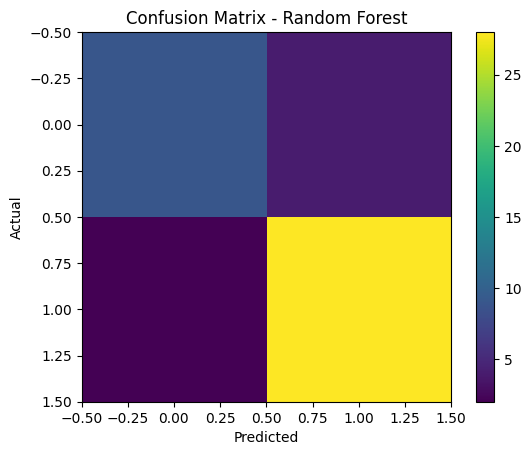

In [5]:
# CONFUSION MATRIX

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()

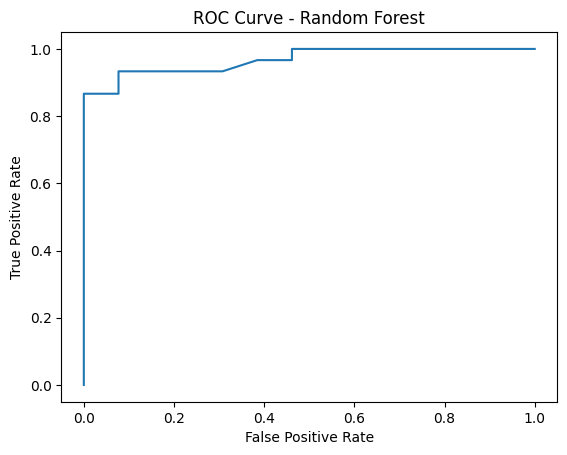

ROC-AUC Score: 0.967948717948718


In [6]:
#ROC CURVE

y_prob = rf_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr)
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

print("ROC-AUC Score:", roc_auc)


=== FEATURE IMPORTANCE ===
                           Feature  Importance
1              Nilai rata-rata SMP    0.306401
6                              IPK    0.188671
3              Nilai rata-rata SMA    0.138482
11    Nilai rata-rata pascasarjana    0.114270
9        Nilai tes kemampuan kerja    0.059455
4      Lembaga pendidikan kelas 12    0.045456
8   Pengalaman kerja sebelum lulus    0.036220
10         Pendidikan pascasarjana    0.026787
2      Lembaga pendidikan kelas 10    0.026447
0                    Jenis Kelamin    0.026354
5                 Jurusan saat SMA    0.017448
7            Program studi sarjana    0.014009


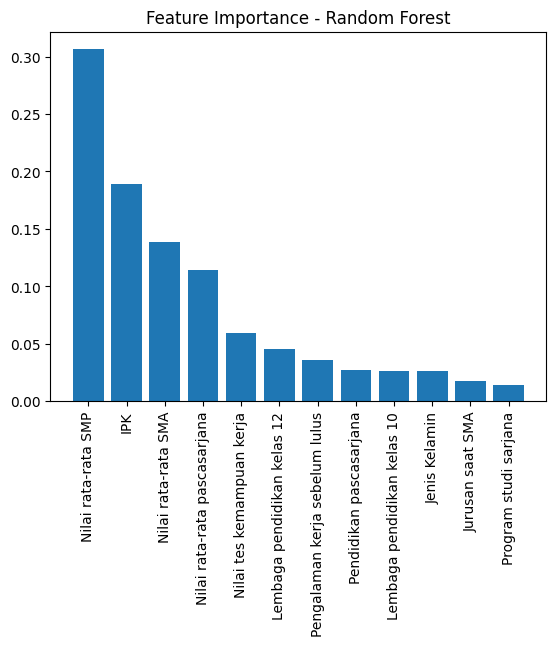

In [7]:
#FEATURE IMPORTANCE

importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\n=== FEATURE IMPORTANCE ===")
print(importances)

plt.figure()
plt.bar(importances["Feature"], importances["Importance"])
plt.xticks(rotation=90)
plt.title("Feature Importance - Random Forest")
plt.show()